## K Means Clustering (Unsupervised Learning)

In K Means, algoeithm try to make K clusters of given data, minimizing intertia/sum of square of distance from centeroid within cluster. 
We decide K either by visualizing data (which is not always possible in higher dimensions) or by using Elbow Method.

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
data = pd.read_csv('income.csv')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

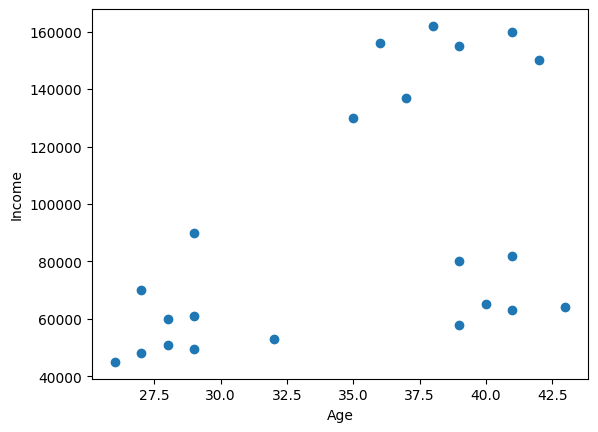

In [165]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

We can see that range of Income attribute is in thousands while Age is very small comparatively.
So we have to standardize it.

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Income($)','Age']] = scaler.fit_transform(data[['Income($)','Age']])
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


Text(0, 0.5, 'Income')

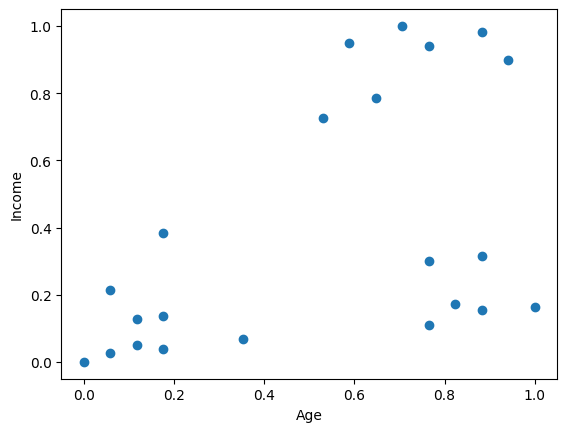

In [167]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [168]:
X = data.drop(['Name'],axis=1)
X

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [169]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)
labels = km.predict(X)
X['label'] = labels

Text(0, 0.5, 'Income')

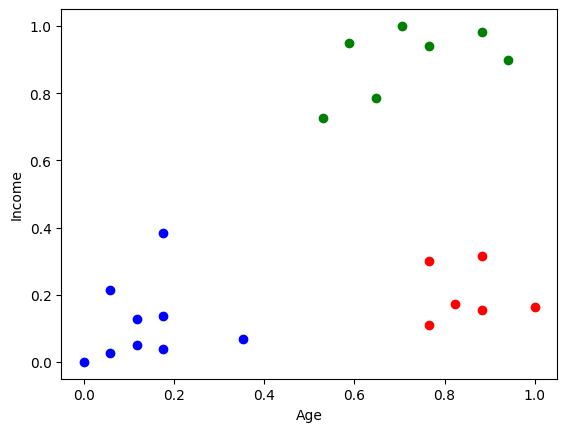

In [170]:
X1 = X[X.label==0]
X2 = X[X.label==1]
X3 = X[X.label==2]
plt.scatter(X1['Age'],X1['Income($)'],color='r')
plt.scatter(X2['Age'],X2['Income($)'],color='b')
plt.scatter(X3['Age'],X3['Income($)'],color='g')
plt.xlabel('Age')
plt.ylabel('Income')

In [171]:
km.inertia_

0.4750783498553096

Text(0, 0.5, 'Income')

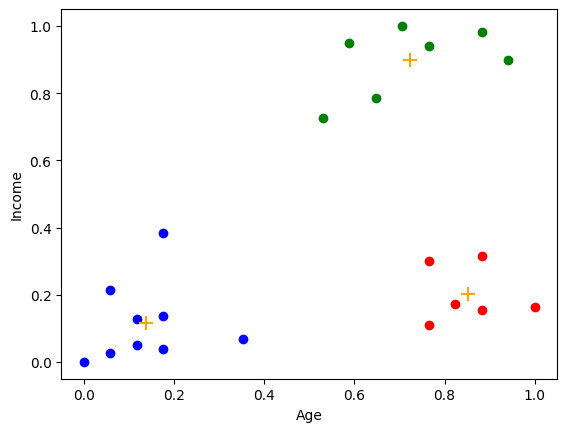

In [172]:
centeroids = km.cluster_centers_
plt.scatter(X1['Age'],X1['Income($)'],color='r')
plt.scatter(X2['Age'],X2['Income($)'],color='b')
plt.scatter(X3['Age'],X3['Income($)'],color='g')
plt.scatter(centeroids[:,0],centeroids[:,1],color='orange',marker='+',s=100)
plt.xlabel('Age')
plt.ylabel('Income')

In [173]:
K = np.arange(start=1,stop=11)
inertia = []
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X[['Age','Income($)']])
    inertia.append(km.inertia_)
inertia

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22443334487241418,
 0.1685851223602976,
 0.13943875937229083,
 0.10497488680620909,
 0.08191902286777042]

Text(0, 0.5, 'inertia/sum-square-distance')

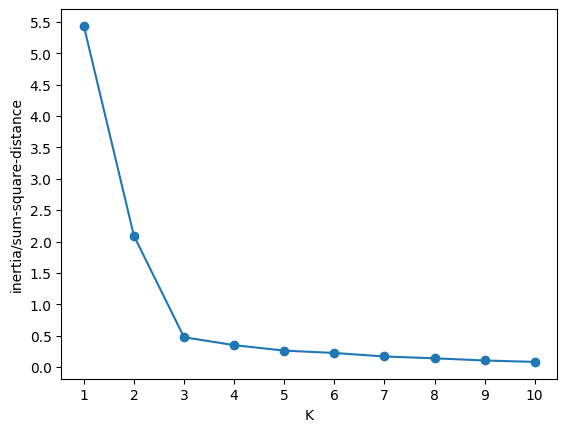

In [174]:
plt.plot(K,inertia,marker='o')
# plt.plot(3*np.ones(10),inertia)
plt.xticks(K)
plt.yticks(np.arange(0,max(inertia)+0.5,0.5))
plt.xlabel('K')
plt.ylabel('inertia/sum-square-distance')

Value at which graph of K vs inertia takes turn (K=3 in this particular case), is best fit for K